# Gate and Instructions 
- Gate contains <b>unitary</b> quantum gates 
- But Instructions contain <b> non - unitary </b> components such as measurements or resets


In [1]:
from qiskit import *

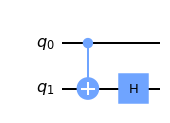

In [19]:
q = QuantumCircuit(2)
q.cx(0,1)
q.h(1)
q.draw(output='mpl')


In [29]:
gate = q.to_gate()
gate_pow2 = gate.power(2)
# can raise the gate to a power 
# repeat it basically in the circuit 

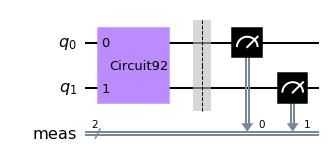

In [30]:
new = QuantumCircuit(2)
new.append(gate,[0,1])
new.measure_all()
new.draw(output='mpl')


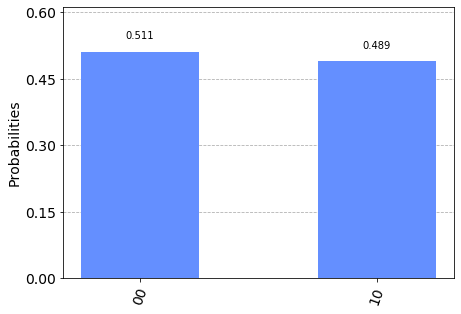

In [31]:
b = Aer.get_backend('qasm_simulator')
from qiskit.tools.visualization import plot_histogram
plot_histogram(execute(new,backend = b,shots = 1024).result().get_counts())

In [44]:
# If we have measurements and initialisations involved in the 
# circuit then the circuit is actually an instruction 
q2 = QuantumCircuit(2)

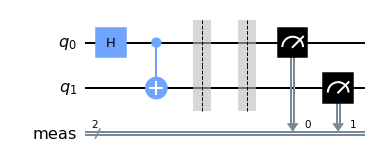

In [45]:
q2.h(0)
q2.cx(0,1)
q2.barrier()
q2.measure_all()
q2.draw(output='mpl')

In [47]:
inst = q2.to_instruction()
inst.power(2) # you can't raise it to any powers as it is not unitary

AttributeError: 'Instruction' object has no attribute 'power'

# Combining Two quantum circuits
- For combining circuits with same number of qubits


In [58]:
# just use the addition operator
q1 = QuantumCircuit(3)
q2 = QuantumCircuit(3)
q1.x(0)
q1.x(2)
q1.cx(1,2)
q1.measure_all()
q1.barrier()

q2.x(0)
q2.cx(0,1)
q2.x(2)
q2.measure_all()
q2.barrier()

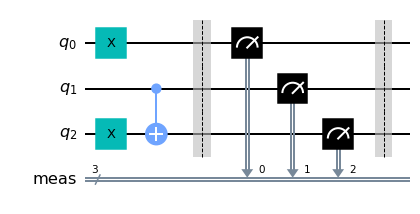

In [59]:
q1.draw(output='mpl')

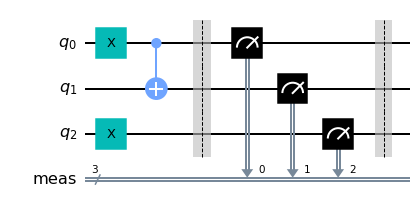

In [60]:
q2.draw(output='mpl')

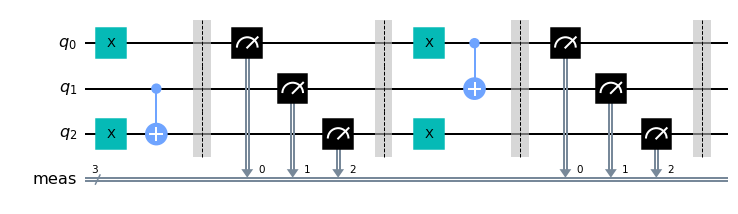

In [61]:
#combining is just easy 
# + operator is overloaded 
q3 = q1 + q2 
q3.draw(output='mpl')

## Combining circuits with different number of qubits 
- We use the compose function for the combination of the circuits 
-  **NOTE** -> q1.compose(q2) adding <b> q2 to q1 </b>  
- Then we specify which qubit of q1 plays the roles of the qubits in the q2 circuit 


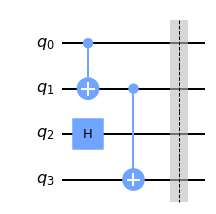

In [66]:
q1 = QuantumCircuit(4)
q1.cx(0,1)
q1.cx(1,3)
q1.h(2)
q1.barrier()
q1.draw(output='mpl')

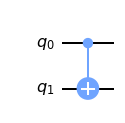

In [63]:
q2 = QuantumCircuit(2)
q2.cx(0,1)
q2.draw(output='mpl')

### q1(0) and q1(1) acts as the participating qubits


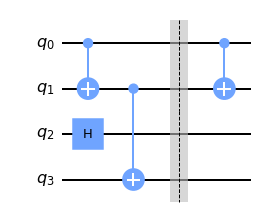

In [67]:
# let us compose them 
q = q1.compose(q2,[0,1]) # i want the zeroth and the first qubits of q1 
                         # to act as the functioning quibts of q2(in that order)
q.draw(output='mpl')

### q1(2) and q1(3) act as the participating qubits

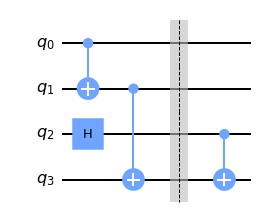

In [68]:
q = q1.compose(q2,[2,3])
q.draw(output='mpl')

In [69]:
q.qubits

[Qubit(QuantumRegister(4, 'q'), 0),
 Qubit(QuantumRegister(4, 'q'), 1),
 Qubit(QuantumRegister(4, 'q'), 2),
 Qubit(QuantumRegister(4, 'q'), 3)]

### ANOTHER WAY
- Make the register with some names 
- Apply gates on the register and if you do addition , qiskit will try to combine the same register gates into one 

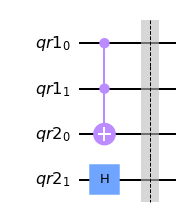

In [72]:
qr1 = QuantumRegister(2,name = 'qr1')
qr2 = QuantumRegister(2,name = 'qr2')
qc = QuantumCircuit(qr1,qr2)
qc.ccx(0,1,2)
qc.h(3)
qc.barrier()
qc.draw(output='mpl')


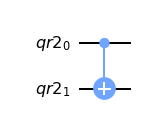

In [73]:
qc2 = QuantumCircuit(qr2)
qc2.cx(0,1)
qc2.draw(output='mpl')

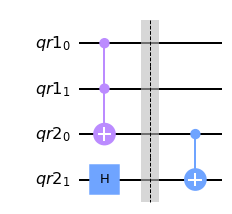

In [75]:
res = qc + qc2 
res.draw(output='mpl')

## Yes, it works..

# But what is a barrier?
- What does it do? 
- Is it just visually separating your components?
- Or is it something else


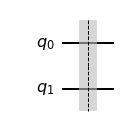

In [76]:
qc = QuantumCircuit(2)
qc.barrier()
qc.draw(output='mpl')

## Barrier 
- is a way to tell the TRANSPILER( optimizer ) what are the PARTS of the circuit 
- Means if we have one barrier, transpiler optimizes left part of the barrier and the right part of the barrier 
- For example 

E:\ANACONDA\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


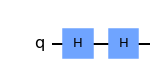

In [83]:
from qiskit import IBMQ
provider = IBMQ.load_account()
arm = provider.get_backend('ibmq_armonk')
q = QuantumCircuit(1)
q.h(0)
q.h(0)
q.draw(output='mpl')

In [84]:
tr = transpile(q,arm)

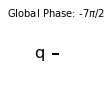

In [85]:
tr.draw(output='mpl')

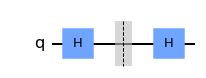

In [86]:
## if we apply barrier 
q = QuantumCircuit(1)
q.h(0)
q.barrier()
q.h(0)
q.draw(output='mpl')

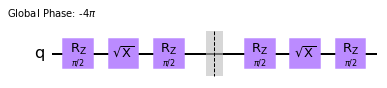

In [87]:
tr = transpile(q,arm)
tr.draw(output='mpl')

## so, yeah!